In [73]:
#Make it python 2.x and 3.x compatible
from __future__ import division, print_function

#Import modules
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.dates as md
import matplotlib.pyplot as plt
import seaborn as sns

import glob as gb
import os
import sys

import re

import datetime as dt
%matplotlib inline

from IPython.display import HTML


from dateutil.parser import parse

sns.set(style="white", context="talk")

# Load total KWH data.

In [74]:
#PC path
#xls = pd.ExcelFile('C:/Users/ycao_000/Box Sync/PROJECTS/Lenovo cr360/Energy Data/KWH by country.xls')
#Mac path
#xls = pd.ExcelFile('KWM2 by country.xls')

# Load total KWH per square meter data.

In [94]:
xls = pd.ExcelFile('KWHM2 by country.xls')

In [95]:
xls.parse?

In [113]:
test1 = xls.parse('Sheet1', na_values='NaN')

In [112]:
test1.groupby(by="Lenovo Global Region").mean().dropna(axis=1).ix[:,1:].sum(axis=1).rank()

Lenovo Global Region
Americas Group    3.0
Asia Pacific      2.0
EMEA              1.0
dtype: float64

In [98]:
quater_cols = ['Apr to Jun 2012',
 'Jul to Sep 2012',
 'Oct to Dec 2012',
 'Jan to Mar 2013',
 'Apr to Jun 2013',
 'Jul to Sep 2013',
 'Oct to Dec 2013',
 'Jan to Mar 2014',
 'Apr to Jun 2014',
 'Jul to Sep 2014',
 'Oct to Dec 2014',
 'Jan to Mar 2015',
 'Apr to Jun 2015',
 'Jul to Sep 2015',
 'Oct to Dec 2015',
 'Jan to Mar 2016']

In [99]:
attribute_cols = ['Active','Lenovo Global Region','Primary Function', 'Subsidiaries', 'Type','Acquisition date','Disposal date']

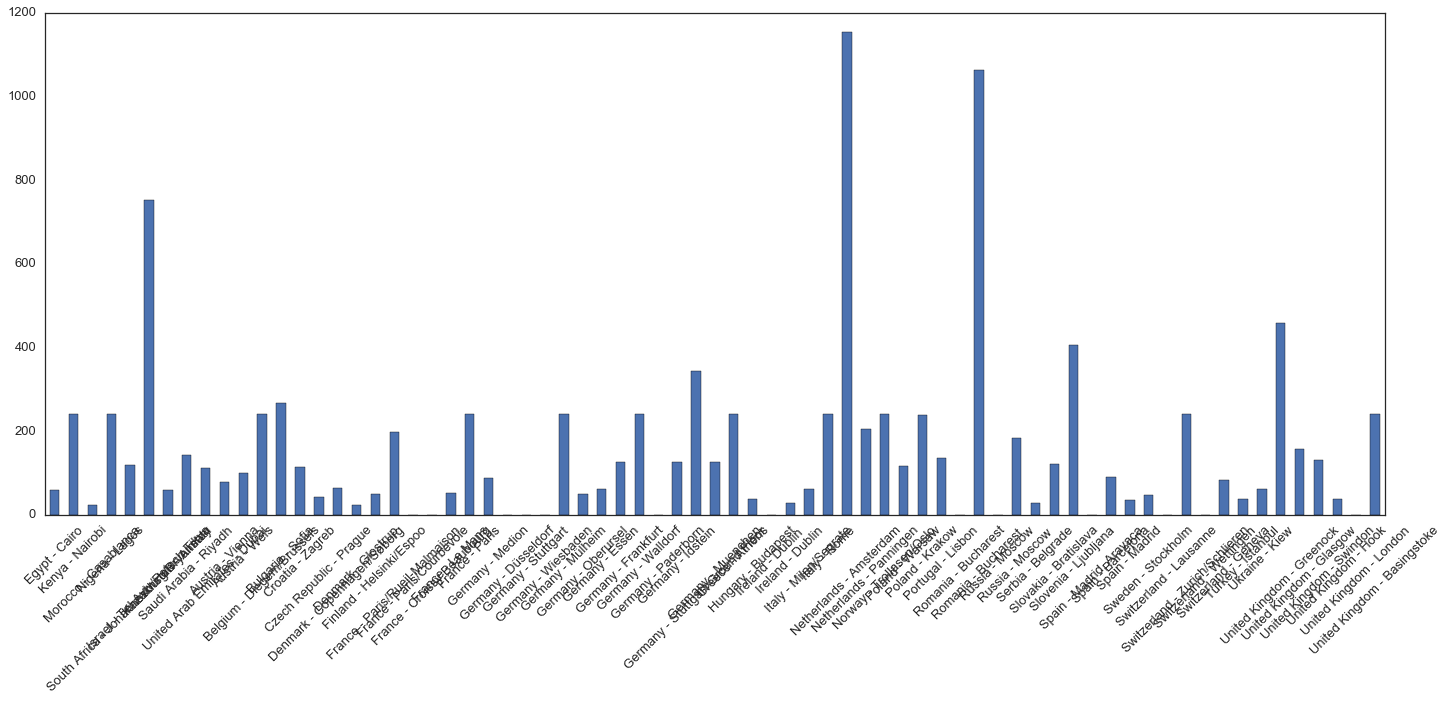

In [105]:
test1[test1['Lenovo Global Region'] == 'EMEA'].ix[:,'Year2015'].plot(figsize=(24,9),kind='bar',rot=45,title="")

In [118]:
test1.groupby(by="Lenovo Global Region").ix[:,'Year2015'].mean().dropna(axis=1)

AttributeError: Cannot access callable attribute 'ix' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [115]:
test1

,Active,Id,Lenovo Global Region,Primary Function,Subsidiaries,T&D Loss Rate Category,Type,Ref,Acquisition date,Disposal date,...,Jan to Mar 2014,Apr to Jun 2014,Jul to Sep 2014,Oct to Dec 2014,Jan to Mar 2015,Apr to Jun 2015,Jul to Sep 2015,Oct to Dec 2015,Jan to Mar 2016,Year2015
Egypt,yes,24619486,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,...,NaN,9.763290,9.870579,9.870579,9.656001,14.873501,15.036946,15.036946,14.873501,59.820896
Egypt - Cairo,yes,24619487,EMEA,Small Office (OSL),Lenovo,NaN,Property,"3054, LEN/SER 0008",NaN,NaN,...,NaN,9.763290,9.870579,9.870579,9.656001,14.873501,15.036946,15.036946,14.873501,59.820896
Kenya,yes,24619488,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,...,NaN,47.053514,51.366316,42.399392,40.460829,63.454073,63.246040,57.919404,58.451613,243.071131
Kenya - Nairobi,yes,24619489,EMEA,Small Office (OSL),Lenovo,NaN,Property,"5145, SER 0024",NaN,NaN,...,NaN,47.053514,51.366316,42.399392,40.460829,63.454073,63.246040,57.919404,58.451613,243.071131
Morocco,yes,24619490,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,...,NaN,10.026875,10.137061,10.137061,9.916690,6.253058,6.321772,6.321772,6.253058,25.149660
Morocco - Casablanca,yes,24619491,EMEA,Small Office (OSL),Lenovo,NaN,Property,3056,NaN,NaN,...,NaN,10.026875,10.137061,10.137061,9.916690,6.253058,6.321772,6.321772,6.253058,25.149660
Nigeria,yes,31106789,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.454073,63.246040,57.919404,58.451613,243.071131
Nigeria - Lagos,yes,31106796,EMEA,Small Office (OSL),x86,NaN,Property,LAG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.454073,63.246040,57.919404,58.451613,243.071131
South Africa,yes,24619492,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,...,NaN,39.890411,40.328767,40.328767,39.452055,30.006145,30.335883,30.335883,30.006145,120.684055
South Africa - Cape Town,no,29031950,Asia Pacific,Small Office (OSL),Lenovo,NaN,Property,NaN,NaN,2014-04-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Lenovo Global Region
Americas Group    Axes(0.125,0.125;0.775x0.775)
Asia Pacific      Axes(0.125,0.125;0.775x0.775)
EMEA              Axes(0.125,0.125;0.775x0.775)
dtype: object

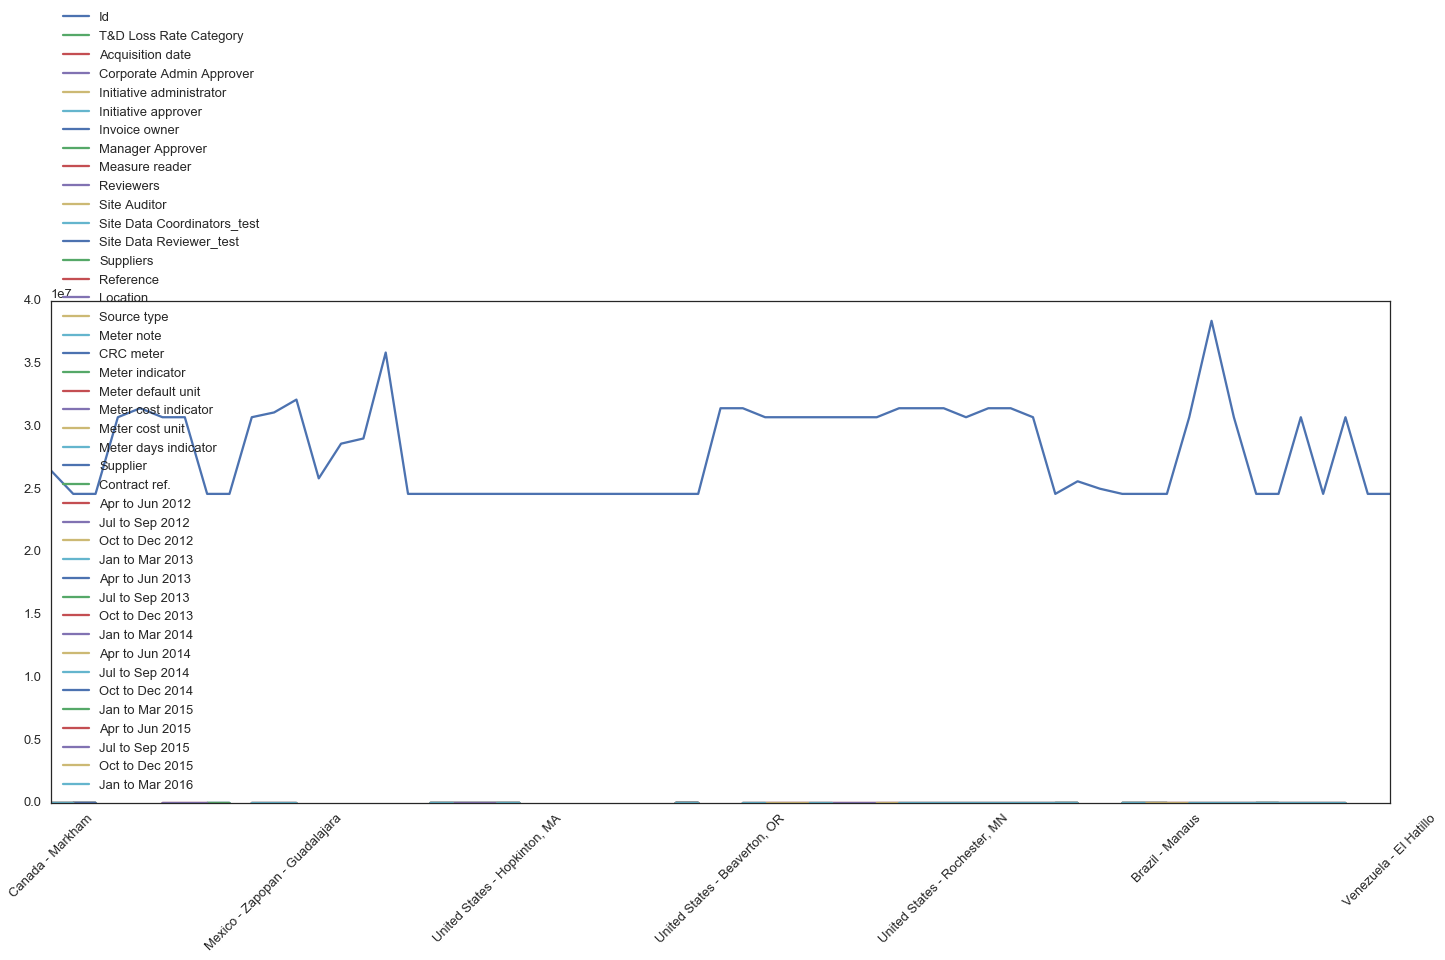

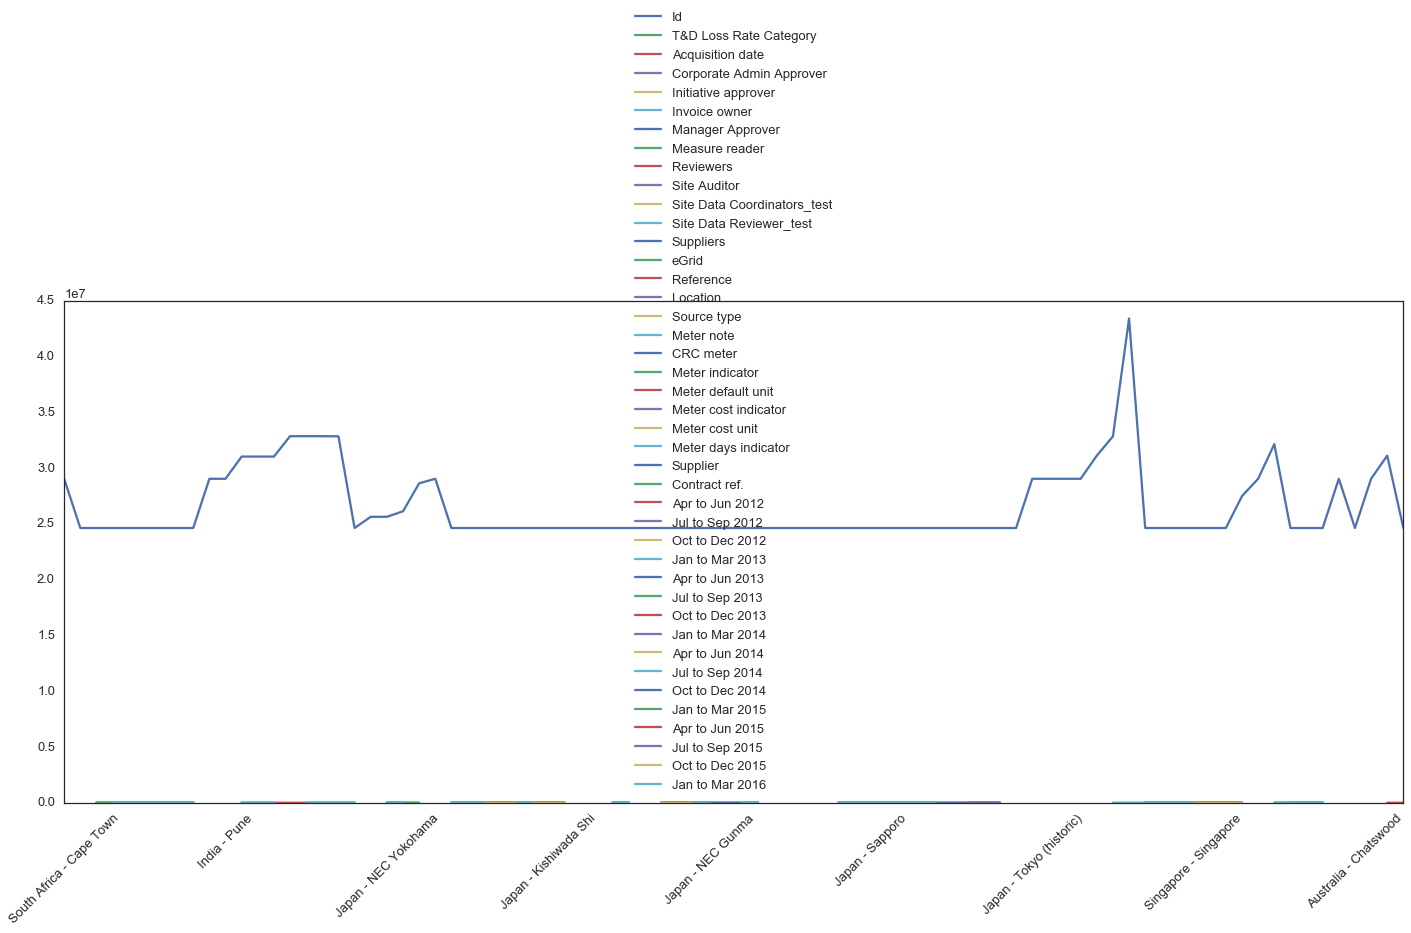

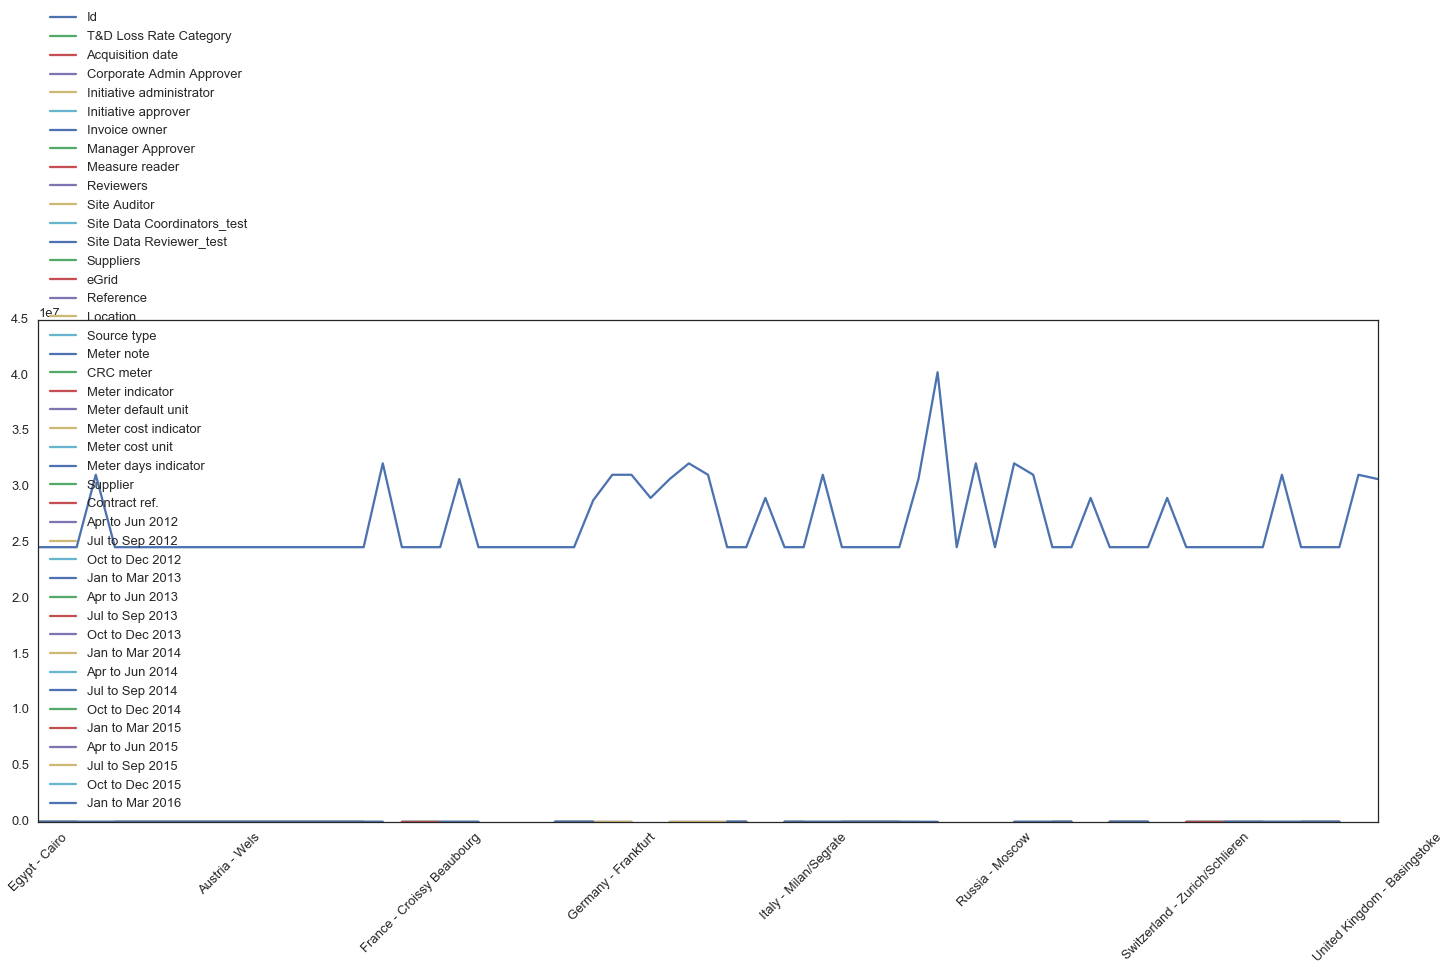

In [85]:
test1.groupby(by="Lenovo Global Region").plot(figsize=(24,9),rot=45)

In [79]:
EMEA = test1[test1['Lenovo Global Region'] == 'EMEA']

In [80]:
EMEA

,Active,Id,Lenovo Global Region,Primary Function,Subsidiaries,T&D Loss Rate Category,Type,Ref,Acquisition date,Disposal date,...,Oct to Dec 2013,Jan to Mar 2014,Apr to Jun 2014,Jul to Sep 2014,Oct to Dec 2014,Jan to Mar 2015,Apr to Jun 2015,Jul to Sep 2015,Oct to Dec 2015,Jan to Mar 2016
Egypt - Cairo,yes,24619487,EMEA,Small Office (OSL),Lenovo,NaN,Property,"3054, LEN/SER 0008",NaN,NaN,...,NaN,NaN,9.763290,9.870579,9.870579,9.656001,14.873501,15.036946,15.036946,14.873501
Kenya - Nairobi,yes,24619489,EMEA,Small Office (OSL),Lenovo,NaN,Property,"5145, SER 0024",NaN,NaN,...,NaN,NaN,47.053514,51.366316,42.399392,40.460829,63.454073,63.246040,57.919404,58.451613
Morocco - Casablanca,yes,24619491,EMEA,Small Office (OSL),Lenovo,NaN,Property,3056,NaN,NaN,...,NaN,NaN,10.026875,10.137061,10.137061,9.916690,6.253058,6.321772,6.321772,6.253058
Nigeria - Lagos,yes,31106796,EMEA,Small Office (OSL),x86,NaN,Property,LAG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.454073,63.246040,57.919404,58.451613
South Africa - Johannesburg/Bryanston,yes,24619493,EMEA,Small Office (OSL),Lenovo,NaN,Property,3055,NaN,NaN,...,NaN,NaN,39.890411,40.328767,40.328767,39.452055,30.006145,30.335883,30.335883,30.006145
Israel - Tel Aviv/Petach Tikva,yes,24619554,EMEA,Small Office (OSL),Lenovo,NaN,Property,3032,NaN,NaN,...,NaN,NaN,35.530333,35.920776,35.920776,35.139889,187.386366,189.445557,189.445557,187.386366
Kazakhstan - Almaty,yes,24619596,EMEA,Small Office (OSL),Lenovo,NaN,Property,5146,NaN,NaN,...,NaN,NaN,14.152297,14.307816,14.307816,13.996777,14.725463,14.887282,14.887282,14.725463
Saudi Arabia - Riyadh,yes,24619604,EMEA,Small Office (OSL),Lenovo,NaN,Property,5065,NaN,NaN,...,NaN,NaN,31.039052,31.380141,31.380141,30.697964,35.885261,36.279604,36.279604,35.885261
United Arab Emirates - Dubai,yes,24619613,EMEA,Small Office (OSL),Lenovo,NaN,Property,"5058, SER 0019",NaN,NaN,...,NaN,NaN,6.512456,6.584021,6.584021,6.440890,30.153569,30.484927,26.169780,25.885326
Austria - Vienna,yes,24619624,EMEA,Small Office (OSL),Lenovo,NaN,Property,5095,NaN,NaN,...,NaN,NaN,13.078844,13.222568,13.222568,12.935121,19.655054,19.871043,19.871043,19.655054


# Read KWH/M2 for only year 2015. 

In [47]:
xls2= pd.ExcelFile('C:/Users/ycao_000/Box Sync/PROJECTS/Lenovo cr360/Energy Data/KWHM2 by country_2015.xls',skiprow=6)
annual2015 = xls.parse('Sheet1')


In [51]:
#List all the global regions
annual2015['Lenovo Global Region']

Egypt                                                                              NaN
Egypt - Cairo                                                                     EMEA
Kenya                                                                              NaN
Kenya - Nairobi                                                                   EMEA
Morocco                                                                            NaN
Morocco - Casablanca                                                              EMEA
Nigeria                                                                            NaN
Nigeria - Lagos                                                                   EMEA
South Africa                                                                       NaN
South Africa - Cape Town                                                  Asia Pacific
South Africa - Johannesburg/Bryanston                                             EMEA
India                                      

In [53]:
# Create a filter, group by global region.
#example weekdays = df['IsWeekend'] <5
EMEA2015 = annual2015['Lenovo Global Region']=='EMEA'
Americas_Group2015 = annual2015['Lenovo Global Region']=='Americas Group'
Asia_Pacific2015 = annual2015['Lenovo Global Region']=='Asia Pacific'

In [57]:
EMEA2015.head()

Egypt              False
Egypt - Cairo       True
Kenya              False
Kenya - Nairobi     True
Morocco            False
Name: Lenovo Global Region, dtype: bool

In [58]:
Americas_Group2015.head()

Egypt              False
Egypt - Cairo      False
Kenya              False
Kenya - Nairobi    False
Morocco            False
Name: Lenovo Global Region, dtype: bool

In [59]:
Asia_Pacific2015.head()

Egypt              False
Egypt - Cairo      False
Kenya              False
Kenya - Nairobi    False
Morocco            False
Name: Lenovo Global Region, dtype: bool

In [ ]:
# Filter for EMEA
df.ix[weekdays, 'IsWeekend'] = 'EMEA2015'
# Filter for weekend: ~boolean takes the opposite value
df.ix[~weekdays, 'IsWeekend'] = 'WeekEnd'

In [60]:
annual2015.EMEA2015.plot(figsize=(24,9), color=sns.color_palette('rainbow', 12), title="EMEA2015")

AttributeError: 'DataFrame' object has no attribute 'EMEA2015'

In [172]:
#replace n/a to NaN
df_number2 = df_number.replace(to_replace='n/a', value='NaN')

In [174]:
df_number2

,Apr to Jun 2012,Jul to Sep 2012,Oct to Dec 2012,Jan to Mar 2013,Apr to Jun 2013,Jul to Sep 2013,Oct to Dec 2013,Jan to Mar 2014,Apr to Jun 2014,Jul to Sep 2014,Oct to Dec 2014,Jan to Mar 2015,Apr to Jun 2015,Jul to Sep 2015,Oct to Dec 2015,Jan to Mar 2016
Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.76329,9.87058,9.87058,9.656,14.8735,15.0369,15.0369,14.8735
Egypt - Cairo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.76329,9.87058,9.87058,9.656,14.8735,15.0369,15.0369,14.8735
Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0535,51.3663,42.3994,40.4608,63.4541,63.246,57.9194,58.4516
Kenya - Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0535,51.3663,42.3994,40.4608,63.4541,63.246,57.9194,58.4516
Morocco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0269,10.1371,10.1371,9.91669,6.25306,6.32177,6.32177,6.25306
Morocco - Casablanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0269,10.1371,10.1371,9.91669,6.25306,6.32177,6.32177,6.25306
Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.4541,63.246,57.9194,58.4516
Nigeria - Lagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.4541,63.246,57.9194,58.4516
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.8904,40.3288,40.3288,39.4521,30.0061,30.3359,30.3359,30.0061
South Africa - Cape Town,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
type(df_number2.ix[0,0])

str

In [176]:
df_number2.shape

(276, 16)

In [177]:
df_number2.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, Egypt to Generated on 6/24/2016 5:07 PM using scenario: Merged data (default)
Data columns (total 16 columns):
Apr to Jun 2012    274 non-null object
Jul to Sep 2012    274 non-null object
Oct to Dec 2012    274 non-null object
Jan to Mar 2013    274 non-null object
Apr to Jun 2013    274 non-null object
Jul to Sep 2013    274 non-null object
Oct to Dec 2013    274 non-null object
Jan to Mar 2014    274 non-null object
Apr to Jun 2014    274 non-null object
Jul to Sep 2014    274 non-null object
Oct to Dec 2014    274 non-null object
Jan to Mar 2015    274 non-null object
Apr to Jun 2015    274 non-null object
Jul to Sep 2015    274 non-null object
Oct to Dec 2015    274 non-null object
Jan to Mar 2016    274 non-null object
dtypes: object(16)
memory usage: 36.7+ KB


In [178]:
temp_trans = df_number2.transpose()

In [179]:
df_number2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, Egypt to Generated on 6/24/2016 5:07 PM using scenario: Merged data (default)
Data columns (total 16 columns):
Apr to Jun 2012    274 non-null object
Jul to Sep 2012    274 non-null object
Oct to Dec 2012    274 non-null object
Jan to Mar 2013    274 non-null object
Apr to Jun 2013    274 non-null object
Jul to Sep 2013    274 non-null object
Oct to Dec 2013    274 non-null object
Jan to Mar 2014    274 non-null object
Apr to Jun 2014    274 non-null object
Jul to Sep 2014    274 non-null object
Oct to Dec 2014    274 non-null object
Jan to Mar 2015    274 non-null object
Apr to Jun 2015    274 non-null object
Jul to Sep 2015    274 non-null object
Oct to Dec 2015    274 non-null object
Jan to Mar 2016    274 non-null object
dtypes: object(16)
memory usage: 36.7+ KB


In [180]:
df_number2.convert_objects(convert_numeric=True)

C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


,Apr to Jun 2012,Jul to Sep 2012,Oct to Dec 2012,Jan to Mar 2013,Apr to Jun 2013,Jul to Sep 2013,Oct to Dec 2013,Jan to Mar 2014,Apr to Jun 2014,Jul to Sep 2014,Oct to Dec 2014,Jan to Mar 2015,Apr to Jun 2015,Jul to Sep 2015,Oct to Dec 2015,Jan to Mar 2016
Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.763290,9.870579,9.870579,9.656001,14.873501,15.036946,15.036946,14.873501
Egypt - Cairo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.763290,9.870579,9.870579,9.656001,14.873501,15.036946,15.036946,14.873501
Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.053514,51.366316,42.399392,40.460829,63.454073,63.246040,57.919404,58.451613
Kenya - Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.053514,51.366316,42.399392,40.460829,63.454073,63.246040,57.919404,58.451613
Morocco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.026875,10.137061,10.137061,9.916690,6.253058,6.321772,6.321772,6.253058
Morocco - Casablanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.026875,10.137061,10.137061,9.916690,6.253058,6.321772,6.321772,6.253058
Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.454073,63.246040,57.919404,58.451613
Nigeria - Lagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.454073,63.246040,57.919404,58.451613
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.890411,40.328767,40.328767,39.452055,30.006145,30.335883,30.335883,30.006145
South Africa - Cape Town,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
#in order to plot, convert all NaNs to zero for now. 
df_number3 = temp_trans.replace(to_replace='NaN', value=0)

In [200]:
df_number3

,Egypt,Egypt - Cairo,Kenya,Kenya - Nairobi,Morocco,Morocco - Casablanca,Nigeria,Nigeria - Lagos,South Africa,South Africa - Cape Town,...,Colombia - Bogotá,Colombia - Bogota MM,Peru,Peru - Lima,Peru - Lima MM,Venezuela,Venezuela - Baruta,Venezuela - El Hatillo,nan,Generated on 6/24/2016 5:07 PM using scenario: Merged data (default)
Apr to Jun 2012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Jul to Sep 2012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Oct to Dec 2012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Jan to Mar 2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Apr to Jun 2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Jul to Sep 2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Oct to Dec 2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Jan to Mar 2014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
Apr to Jun 2014,9.763290,9.763290,47.053514,47.053514,10.026875,10.026875,0.000000,0.000000,39.890411,0,...,16.641205,0.000000,86.560155,86.560155,0.000000,18.359538,0,18.359538,NaN,NaN
Jul to Sep 2014,9.870579,9.870579,51.366316,51.366316,10.137061,10.137061,0.000000,0.000000,40.328767,0,...,16.824076,0.000000,87.511366,87.511366,0.000000,18.561291,0,18.561291,NaN,NaN


# Global plot, doesn't make any sense, too many locations. Just for fun. 

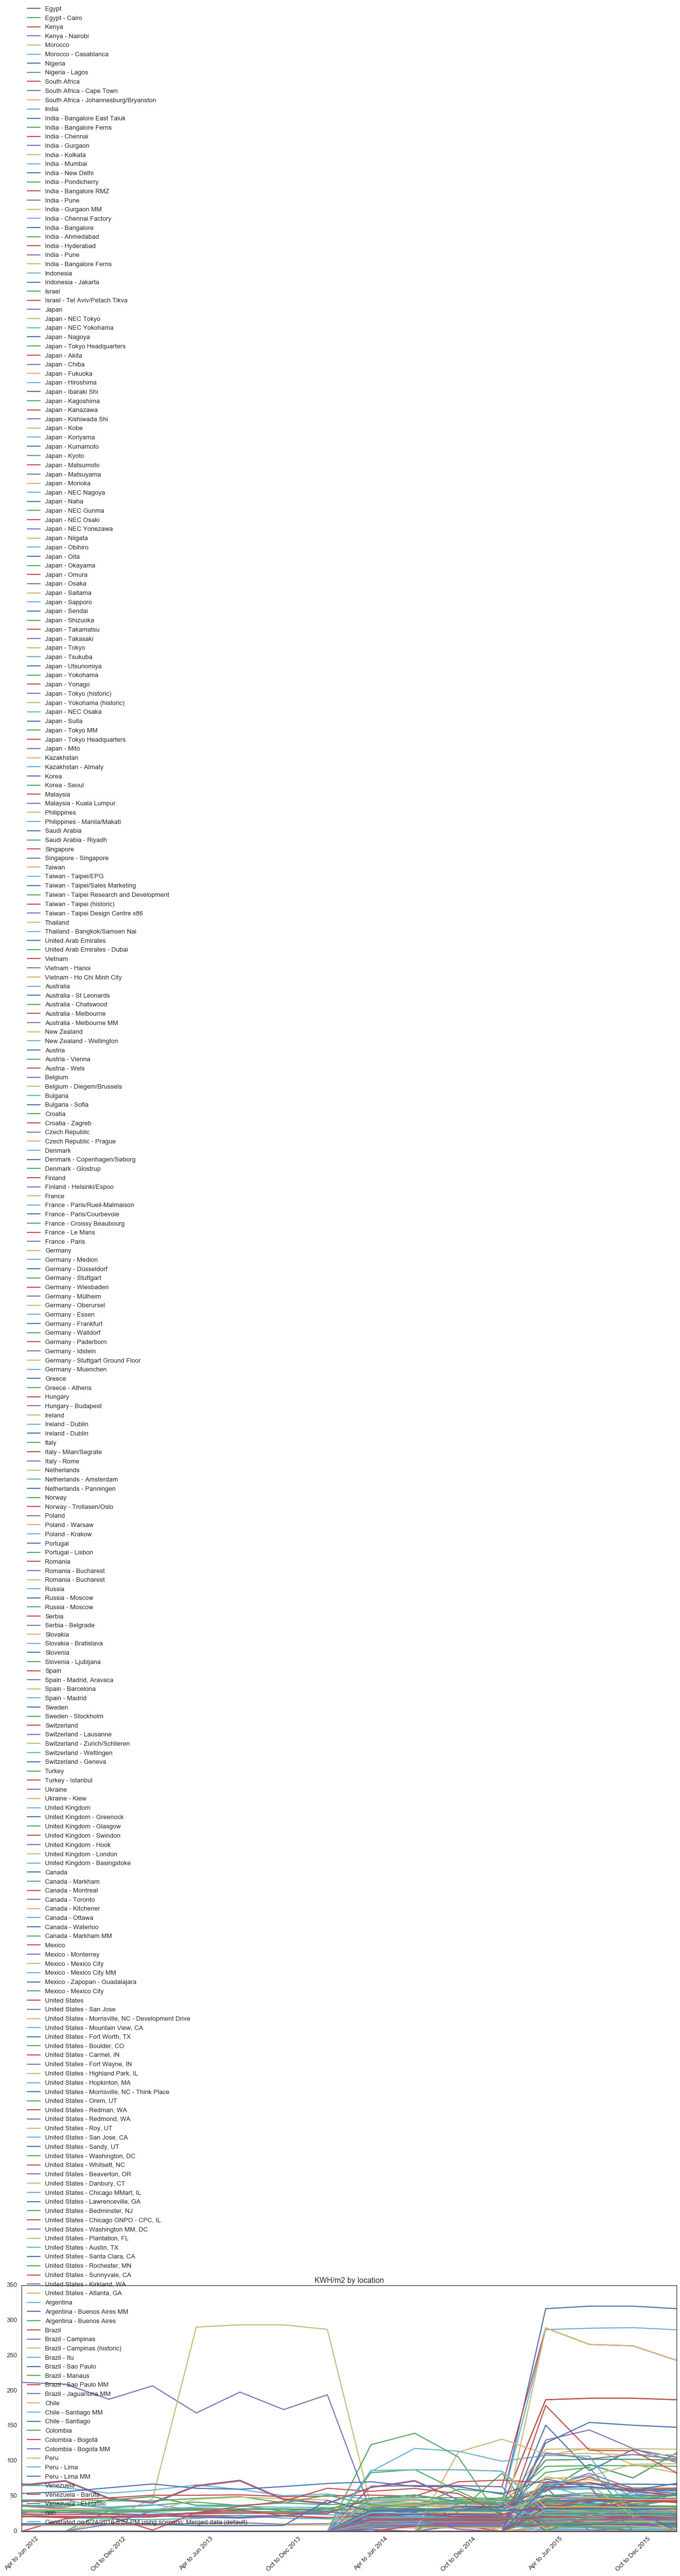

In [199]:
df_number3.plot(kind = 'line',title='KWH/m2 by location',rot=45,figsize=(24,9))

In [ ]:
#Note the curve is missing all the 2012 and 2013 data. 

#Just for today,  create plots by 'Lenovo global regions', dumb enough, definitely will be much smarter

In [201]:
#list all the locations we have, still have to delete country name, should be very easy but didn't figure out now. 
list(df_number2.index)

['Egypt',
 'Egypt - Cairo',
 'Kenya',
 'Kenya - Nairobi',
 'Morocco',
 'Morocco - Casablanca',
 'Nigeria',
 'Nigeria - Lagos',
 'South Africa',
 'South Africa - Cape Town',
 'South Africa - Johannesburg/Bryanston',
 'India',
 'India - Bangalore East Taluk',
 'India - Bangalore Ferns',
 'India - Chennai',
 'India - Gurgaon',
 'India - Kolkata',
 'India - Mumbai',
 'India - New Delhi',
 'India - Pondicherry',
 'India - Bangalore RMZ',
 'India - Pune',
 'India - Gurgaon MM',
 'India - Chennai Factory',
 'India - Bangalore',
 'India - Ahmedabad',
 'India - Hyderabad',
 'India - Pune ',
 'India - Bangalore Ferns ',
 'Indonesia',
 'Indonesia - Jakarta',
 'Israel',
 'Israel - Tel Aviv/Petach Tikva',
 'Japan',
 'Japan - NEC Tokyo',
 'Japan - NEC Yokohama',
 'Japan - Nagoya',
 'Japan - Tokyo Headquarters',
 'Japan - Akita',
 'Japan - Chiba',
 'Japan - Fukuoka',
 'Japan - Hiroshima',
 'Japan - Ibaraki Shi',
 'Japan - Kagoshima',
 'Japan - Kanazawa',
 'Japan - Kishiwada Shi',
 'Japan - Kobe',
 'J

In [212]:
Africa = df_number3[[ 'Egypt - Cairo',
 'Kenya - Nairobi',
 'Morocco - Casablanca',
 'Nigeria - Lagos',
 'South Africa - Cape Town',
 'South Africa - Johannesburg/Bryanston']]

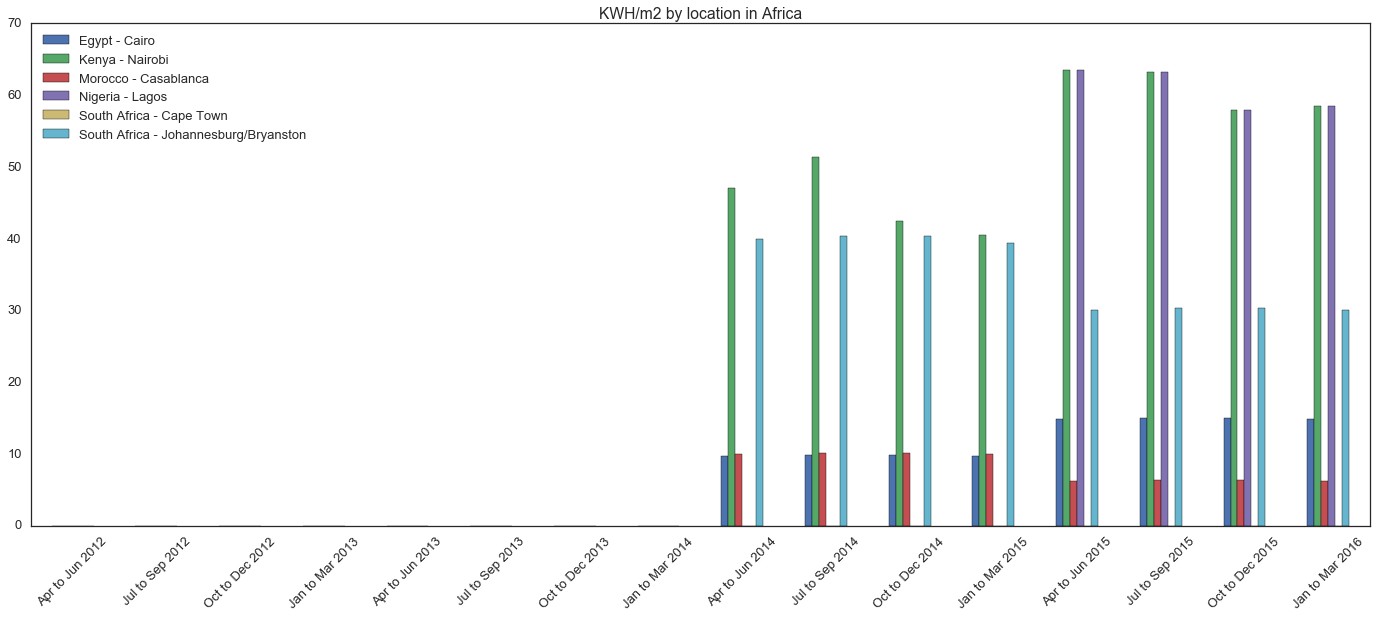

In [213]:
Africa.plot(kind = 'bar',title='KWH/m2 by location in Africa',rot=45,figsize=(24,9))

In [214]:
Australia = df_number3[[ 'Australia - St Leonards',
 'Australia - Chatswood',
 'Australia - Melbourne',
 'Australia - Melbourne MM',
 'New Zealand - Wellington']]

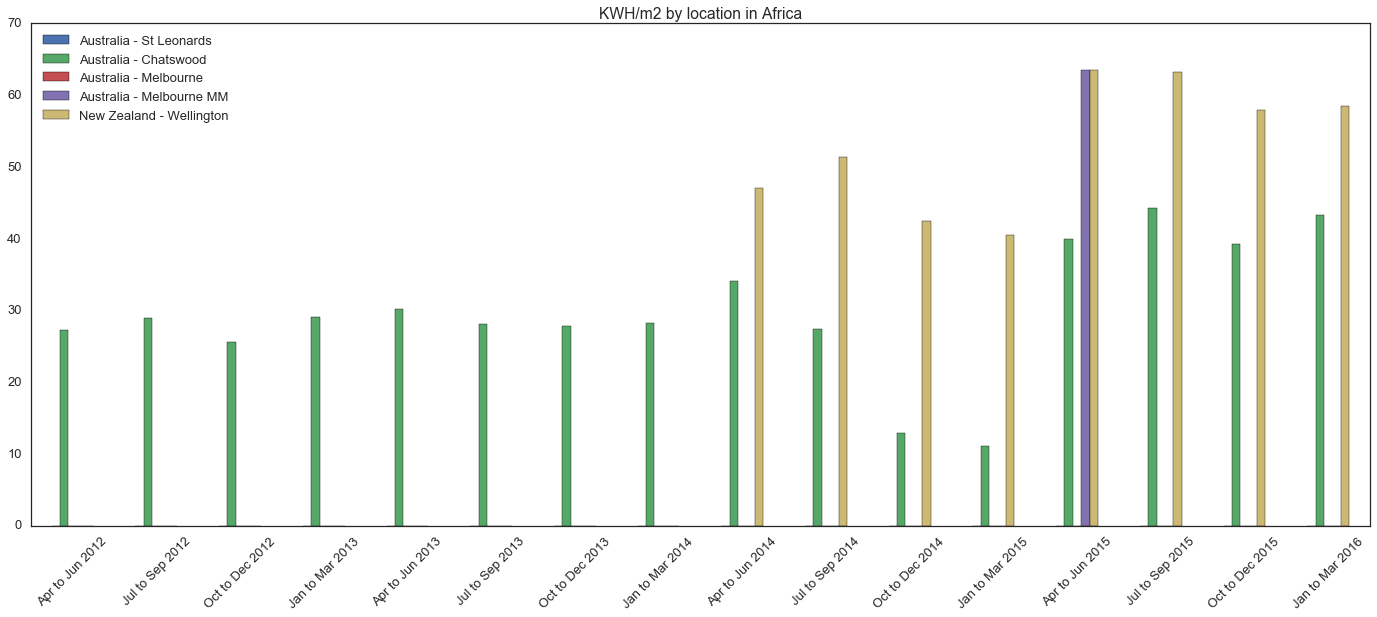

In [215]:
Australia.plot(kind = 'bar',title='KWH/m2 by location in Africa',rot=45,figsize=(24,9))

In [216]:
NorthAmerica= df_number3[[ 'Canada - Markham',
 'Canada - Montreal',
 'Canada - Toronto',
 'Canada - Kitchener',
 'Canada - Ottawa',
 'Canada - Waterloo',
 'Canada - Markham MM',
 'Mexico - Monterrey',
 'Mexico - Mexico City',
 'Mexico - Mexico City MM',
 'Mexico - Zapopan - Guadalajara',
 'Mexico - Mexico City ',
 'United States - San Jose',
 'United States - Morrisville, NC - Development Drive',
 'United States - Mountain View, CA',
 'United States - Fort Worth, TX',
 'United States - Boulder, CO',
 'United States - Carmel, IN',
 'United States - Fort Wayne, IN',
 'United States - Highland Park, IL',
 'United States - Hopkinton, MA',
 'United States - Morrisville, NC - Think Place',
 'United States - Orem, UT',
 'United States - Redman, WA',
 'United States - Redmond, WA',
 'United States - Roy, UT',
 'United States - San Jose, CA',
 'United States - Sandy, UT',
 'United States - Washington, DC',
 'United States - Whitsett, NC',
 'United States - Beaverton, OR',
 'United States - Danbury, CT',
 'United States - Chicago MMart, IL',
 'United States - Lawrenceville, GA',
 'United States - Bedminster, NJ',
 'United States - Chicago GNPO - CPC, IL',
 'United States - Washington MM, DC',
 'United States - Plantation, FL',
 'United States - Austin, TX',
 'United States - Santa Clara, CA',
 'United States - Rochester, MN',
 'United States - Sunnyvale, CA',
 'United States - Kirkland, WA',
 'United States - Atlanta, GA']]

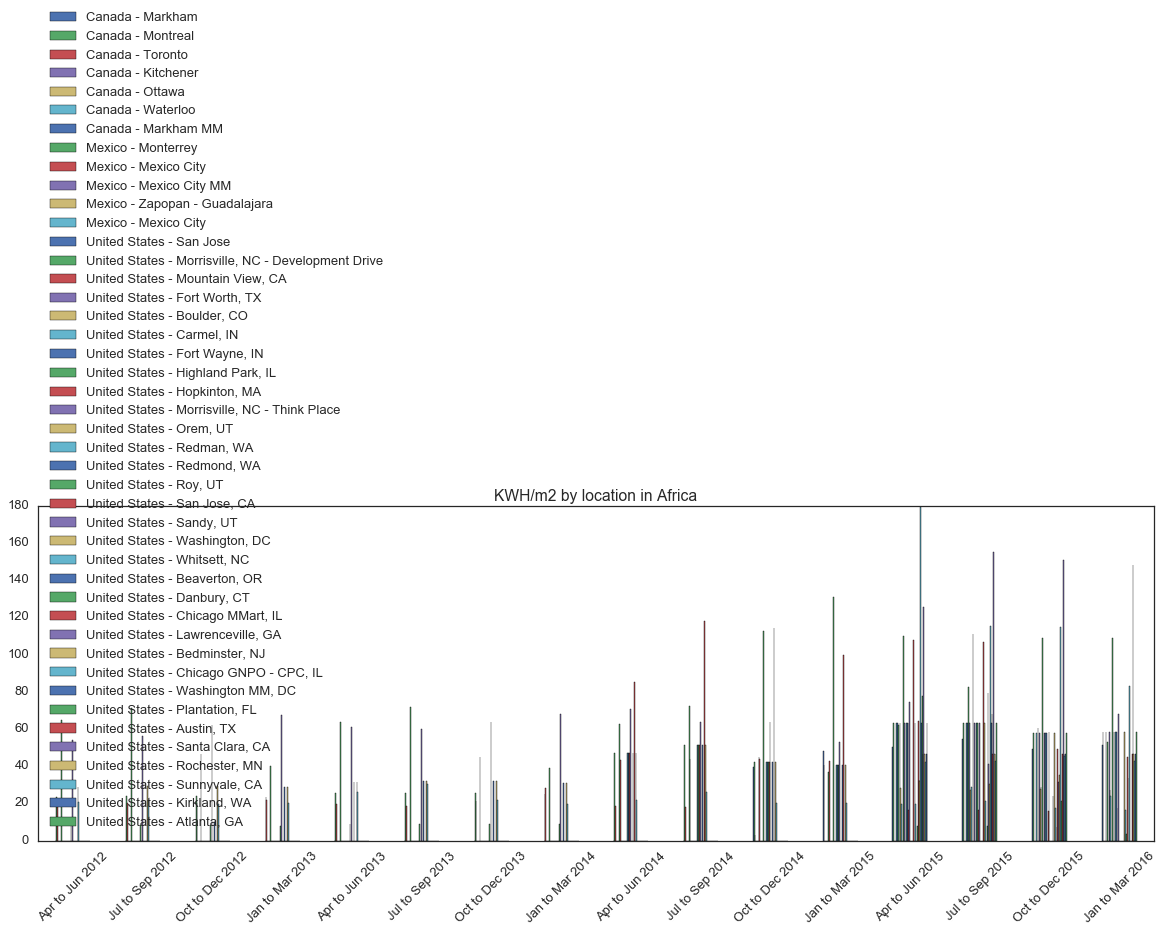

In [217]:
NorthAmerica.plot(kind = 'bar',title='KWH/m2 by location in NorthAmerica',rot=45,figsize=(20,6))

In [223]:
SouthAmerica=df_number3[[  'Argentina - Buenos Aires MM',
 'Argentina - Buenos Aires',
 'Brazil - Campinas',
 'Brazil - Campinas (historic)',
 'Brazil - Itu',
 'Brazil - Sao Paulo',
 'Brazil - Manaus',
 'Brazil - Sao Paulo MM',
 'Brazil - Jaguariuna MM',
 'Chile - Santiago MM',
 'Chile - Santiago',
 'Colombia - Bogotá',
 'Colombia - Bogota MM',
 'Peru - Lima',
 'Peru - Lima MM',
 'Venezuela - Baruta',
 'Venezuela - El Hatillo']]

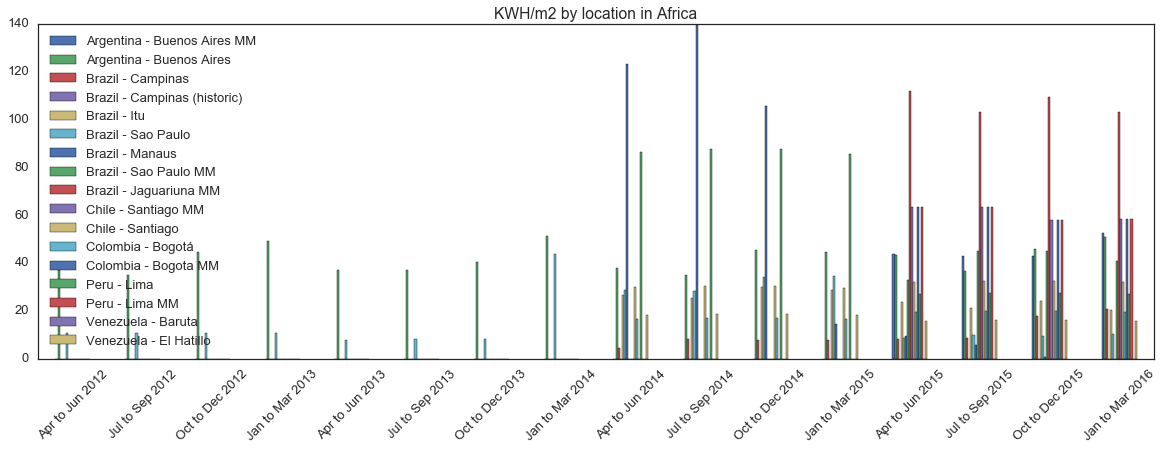

In [224]:
SouthAmerica.plot(kind = 'bar',title='KWH/m2 by location in Africa',rot=45,figsize=(20,6))